In [1]:
%load_ext autoreload
%autoreload 2
from Methods import sentenceSimilarityMethods,JobOffers,dataframeHelpers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
autoreload JobOffers,dataframeHelpers

In [4]:
jobsDf = dataframeHelpers.buildJobsDF("Data/output_V1.1.1000.translate.json")

In [5]:
#jobsDf.to_csv("Data/1000TranslatedJobs.csv")

In [6]:
skillsDf = dataframeHelpers.buildSkillsDF()

In [7]:
skillsDf

,CATEGORY,SKILL_CONTENT,SKILL_ID
0,Complex problem solving skills,Identifying complex problems and reviewing rel...,296
1,Resource management skills,Developed capacities used to allocate resource...,297
2,Management of Financial Resources,Determining how money will be spent to get the...,298
3,Management of Material Resources,Obtaining and seeing to the appropriate use of...,299
4,Management of Personnel Resources —,"Motivating, developing, and directing people a...",300
...,...,...,...
78,Transportation,Knowledge of principles and methods for moving...,387
79,Diplôme,Diploma equivalent,390
80,diplôme équivalent,Diploma or cfc,391
81,master,Master’s degree,392


In [8]:
embeddings = dataframeHelpers.getEmbeddingsWSkills(skillsDf, jobsDf)

In [9]:
jobsDf = dataframeHelpers.addEmbeddingsToJobs(jobsDf, embeddings)
skillsDf = dataframeHelpers.addEmbeddingsToSkills(skillsDf, embeddings)

In [10]:
skillsDf

,CATEGORY,SKILL_CONTENT,SKILL_ID,SKILL_SCORES
0,Complex problem solving skills,Identifying complex problems and reviewing rel...,296,"(tf.Tensor(0.057766527, shape=(), dtype=float3..."
1,Resource management skills,Developed capacities used to allocate resource...,297,"(tf.Tensor(0.079673186, shape=(), dtype=float3..."
2,Management of Financial Resources,Determining how money will be spent to get the...,298,"(tf.Tensor(0.029886357, shape=(), dtype=float3..."
3,Management of Material Resources,Obtaining and seeing to the appropriate use of...,299,"(tf.Tensor(-0.017312534, shape=(), dtype=float..."
4,Management of Personnel Resources —,"Motivating, developing, and directing people a...",300,"(tf.Tensor(-0.011685572, shape=(), dtype=float..."
...,...,...,...,...
78,Transportation,Knowledge of principles and methods for moving...,387,"(tf.Tensor(0.085520335, shape=(), dtype=float3..."
79,Diplôme,Diploma equivalent,390,"(tf.Tensor(-0.02099372, shape=(), dtype=float3..."
80,diplôme équivalent,Diploma or cfc,391,"(tf.Tensor(0.05272436, shape=(), dtype=float32..."
81,master,Master’s degree,392,"(tf.Tensor(0.039518483, shape=(), dtype=float3..."


In [11]:
skillsResultsDf = pd.DataFrame()

In [12]:
for label in ["JOB_ID", "JOB_SCORES"]:
    skillsResultsDf[label] = jobsDf[label]

In [13]:
skillsResultsDf = skillsResultsDf.merge(skillsDf, how = "cross")

In [14]:
skillsResultsDf = skillsResultsDf[["JOB_ID", "SKILL_ID", "JOB_SCORES", "SKILL_SCORES"]]

In [15]:
skillsResultsDf

,JOB_ID,SKILL_ID,JOB_SCORES,SKILL_SCORES
0,12220025,296,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.057766527, shape=(), dtype=float3..."
1,12220025,297,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.079673186, shape=(), dtype=float3..."
2,12220025,298,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.029886357, shape=(), dtype=float3..."
3,12220025,299,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(-0.017312534, shape=(), dtype=float..."
4,12220025,300,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(-0.011685572, shape=(), dtype=float..."
...,...,...,...,...
82995,14795850,387,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.085520335, shape=(), dtype=float3..."
82996,14795850,390,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(-0.02099372, shape=(), dtype=float3..."
82997,14795850,391,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.05272436, shape=(), dtype=float32..."
82998,14795850,392,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.039518483, shape=(), dtype=float3..."


In [16]:
%time skillsResultsDf["DISTANCES"] = skillsResultsDf.apply(dataframeHelpers.distCalc, args=["SKILL_SCORES"], axis =1)

CPU times: user 2min 18s, sys: 934 ms, total: 2min 19s
Wall time: 2min 22s


In [17]:
skillsResultsDf["LOWEST_DISTANCE"] = skillsResultsDf.apply(dataframeHelpers.minDistanceFinder, axis =1)
skillsResultsDf["LOWEST_DISTANCE_SENTENCE"] = skillsResultsDf.apply(dataframeHelpers.minDistanceSentence, args=[jobsDf], axis =1)

In [18]:
skillsResultsDf

,JOB_ID,SKILL_ID,JOB_SCORES,SKILL_SCORES,DISTANCES,LOWEST_DISTANCE,LOWEST_DISTANCE_SENTENCE
0,12220025,296,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.057766527, shape=(), dtype=float3...","[1.1119708319538595, 0.9429020794945738, 1.001...",0.826845,Further information and application We are at...
1,12220025,297,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.079673186, shape=(), dtype=float3...","[1.0660012363021305, 1.0248802599713525, 1.088...",0.868723,You want to gain experience in configuration ...
2,12220025,298,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.029886357, shape=(), dtype=float3...","[0.9638552948844074, 0.8501820166728977, 0.968...",0.850182,To strengthen our team and to optimally proce...
3,12220025,299,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(-0.017312534, shape=(), dtype=float...","[0.9990487297578154, 0.8582688025309635, 1.053...",0.743589,Your chances You can extend your knowledge an...
4,12220025,300,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(-0.011685572, shape=(), dtype=float...","[0.8924788833237, 0.8186661163741937, 0.920063...",0.818666,To strengthen our team and to optimally proce...
...,...,...,...,...,...,...,...
82995,14795850,387,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.085520335, shape=(), dtype=float3...","[1.0333824225436445, 1.0593837579922891, 1.145...",0.830026,Exposure to manufacturing operations and or ...
82996,14795850,390,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(-0.02099372, shape=(), dtype=float3...","[0.9582223381876968, 0.9357990303015858, 0.947...",0.907405,I came for the job I stay for the culture LIALC
82997,14795850,391,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.05272436, shape=(), dtype=float32...","[0.8986541041926607, 0.9298140012780026, 0.981...",0.898654,Job ID 218441BR Position Title Regional QA H...
82998,14795850,392,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.039518483, shape=(), dtype=float3...","[1.0708371770815874, 1.0267473962142455, 0.818...",0.818725,e


In [19]:
skillsResultsDf["AVERAGE_DISTANCE_3SENT"] = skillsResultsDf.apply(dataframeHelpers.averageNSentences, args=[3], axis=1)

In [20]:
skillsResultsDf["AVERAGE_DISTANCE_5SENT"] = skillsResultsDf.apply(dataframeHelpers.averageNSentences, args=[5], axis=1)

In [21]:
skillsResultsDf["AVERAGE_DISTANCE_2SENT"] = skillsResultsDf.apply(dataframeHelpers.averageNSentences, args=[2], axis=1)

0.8744587099710545

In [22]:
column_names = ["JOB_ID", "ISCO", "TRANSLATED_JOBS", "TOP_SKILL_MATCHES", "TOP_SKILL_IDS", "BEST_SKILL_MATCH_3SENT", "BEST_SKILL_ID_3SENT", "BEST_SKILL_MATCH_1SENT", "BEST_SKILL_ID_1SENT", "LOWEST_DISTANCE", ]

In [23]:
topResultsDf = pd.DataFrame(columns = column_names)

In [24]:
for label in ["JOB_ID", "ISCO", "TRANSLATED_JOBS", "ORIGINAL_CONTENT", ]:
    topResultsDf[label] = jobsDf[label]

In [58]:
#topResultsDf.to_csv("PrelimResultsSkillsV26_AllMatches.csv")

In [25]:
cutoff = skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean() - skillsResultsDf["AVERAGE_DISTANCE_3SENT"].std()
print("The cutoff is mean-std for all the average 3 sent. Value is", cutoff)

The cutoff is mean-std for all the average 3 sent. Value is 0.8158394574676803


In [26]:
topResultsDf["BEST_SKILL_MATCH_1SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "LOWEST_DISTANCE", "SKILL_CONTENT"), axis=1)
topResultsDf["BEST_SKILL_MATCH_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "AVERAGE_DISTANCE_3SENT", "SKILL_CONTENT"), axis=1)
topResultsDf["BEST_SKILL_ID_1SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "LOWEST_DISTANCE", "SKILL_ID"), axis=1)
topResultsDf["BEST_SKILL_ID_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "AVERAGE_DISTANCE_3SENT", "SKILL_ID"), axis=1)
topResultsDf["AVERAGE_DISTANCE_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(skillsResultsDf, "AVERAGE_DISTANCE_3SENT", "AVERAGE_DISTANCE_3SENT"), axis=1)
topResultsDf["LOWEST_DISTANCE"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(skillsResultsDf, "LOWEST_DISTANCE", "LOWEST_DISTANCE"), axis=1)

In [27]:
topResultsDf["DISTANCES"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(skillsResultsDf, "AVERAGE_DISTANCE_3SENT", "DISTANCES"), axis=1)

In [28]:
topResultsDf["TOP_SKILL_IDS"] = topResultsDf.apply(dataframeHelpers.bestNMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "AVERAGE_DISTANCE_3SENT", "SKILL_ID", 10, cutoff), axis=1)
topResultsDf["TOP_SKILL_MATCHES"] = topResultsDf.apply(dataframeHelpers.bestNMatchReturn, args=(skillsResultsDf, skillsDf, "SKILL_ID", "AVERAGE_DISTANCE_3SENT", "SKILL_CONTENT", 10, cutoff), axis=1)
topResultsDf


,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_SKILL_MATCHES,TOP_SKILL_IDS,BEST_SKILL_MATCH_3SENT,BEST_SKILL_ID_3SENT,BEST_SKILL_MATCH_1SENT,BEST_SKILL_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES
0,12220025,21420,We are a successful and independent engineerin...,"[Knowledge of materials, methods, and the tool...","[369, 374, 358, 359, 365, 363, 350, 375, 303, ...","Knowledge of materials, methods, and the tools...",369,"Knowledge of materials, methods, and the tools...",369,0.530480,<p>Wir sind ein erfolgreiches und unabhängiges...,0.711262,"[0.9630094146418984, 0.5304800912887739, 0.890..."
1,10814567,21420,We are a prestigious and successful engineerin...,"[Knowledge of materials, methods, and the tool...","[369, 355, 382, 374, 378, 364, 351, 381, 376, ...","Knowledge of materials, methods, and the tools...",369,"Knowledge of materials, methods, and the tools...",369,0.561357,Wir sind eine renommierte und erfolgreiche Ing...,0.701511,"[0.7702778473914276, 1.0188725543283892, 0.772..."
2,12401674,21420,Bill Weyermann Partner AG has been producing e...,"[Knowledge of materials, methods, and the tool...","[369, 364, 353, 357, 350, 341, 361, 343]","Knowledge of materials, methods, and the tools...",369,"Knowledge of materials, methods, and the tools...",369,0.654045,Bill Weyermann Partner AG erbringt seit über\n...,0.758431,"[0.9253709070516101, 1.0285715588159612, 0.838..."
3,12473085,62100,Administration Communale de Valderuzforstartin...,[],[],Diploma or cfc,391,Diploma equivalent,390,0.751800,Administration communale de Val-de-RuzForstwar...,0.844817,"[0.8072586977421344, 0.9458080342855324, 1.039..."
4,12905109,26220;24210,The Straumann Group is experiencing internatio...,[Knowledge of the structure and content of a f...,"[377, 375, 305, 296, 365, 311, 312, 339, 350, ...",Knowledge of the structure and content of a fo...,377,Microsoft Project or Microsoft Share Point,331,0.562944,Le groupe Straumann connaît un succès internat...,0.657193,"[0.8702324828254786, 1.0701344971388203, 1.008..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17126875,24210,Vallorbe SA Metallurgical factories are recogn...,"[Knowledge of raw materials, production proces...","[383, 374, 370, 381, 306, 382, 367, 385, 376, ...","Knowledge of raw materials, production process...",383,"Knowledge of raw materials, production process...",383,0.469349,<p>Les Usines Métallurgiques de Vallorbe SA (U...,0.542781,"[0.9409383820118851, 0.9932221603989863, 1.048..."
996,17140922,43210;24210,Back to Search Results Apply for this item OME...,[Being aware of others' reactions and understa...,"[319, 361, 377, 357, 339, 360, 375, 323, 309, ...",Being aware of others' reactions and understan...,319,Being aware of others' reactions and understan...,319,0.589194,<h2>Retour aux résultats de la recherche</h2>\...,0.740648,"[0.9624009958352743, 0.886352514825982, 0.7738..."
997,17140923,24210,Back to Search Results Apply for this item Ome...,"[Job requires maintaining composure, keeping e...","[363, 374, 361, 383, 357, 377, 356, 355, 385, ...","Job requires maintaining composure, keeping em...",363,Knowledge of business and management principle...,367,0.607232,<h2>Retour aux résultats de la recherche</h2>\...,0.770168,"[0.8350411080686073, 1.035460436827972, 0.9910..."
998,17060287,24210,You are here HomePlayController Quality HF Qua...,[],[],"Knowledge of raw materials, production process...",383,"Knowledge of raw materials, production process...",383,0.715924,Vous êtes ici :AccueilEmploisContrôleur qualit...,0.877853,"[0.8702186314911018, 0.7159238249494841, 1.099..."


In [48]:
topResultsDf

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_SKILL_MATCHES,TOP_SKILL_IDS,BEST_SKILL_MATCH_3SENT,BEST_SKILL_ID_3SENT,BEST_SKILL_MATCH_1SENT,BEST_SKILL_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES
806,17348916,21650,A minimum profile Higher education in computer...,"[ArcGIS software or ESRI ArcMap or QGIS , Auto...","[330, 326, 324, 380, 369, 368]",ArcGIS software or ESRI ArcMap or QGIS,330,ArcGIS software or ESRI ArcMap or QGIS,330,0.339181,<b>Profil minimum requis :</b>\n<ul>\n <li>For...,0.339181,[0.339181158247463]
152,14443080,24210,Industrialization and Quality Engineer. Stim...,"[Knowledge of raw materials, production proces...","[383, 323, 374, 370, 350, 371, 385, 377, 299, ...","Knowledge of raw materials, production process...",383,"Knowledge of raw materials, production process...",383,0.488099,Industrialization and Quality Engineer.\n\n\nS...,0.499768,"[0.7571306846610115, 1.0180303689153778, 1.017..."
347,18311336,24210,Caring for the world one person at a time ins...,"[Knowledge of raw materials, production proces...","[383, 374, 323, 358, 370, 385, 352, 306, 321, ...","Knowledge of raw materials, production process...",383,Job requires analyzing information and using l...,352,0.419813,"<b></b>\n<br>\n<p><b>""Caring for the world… on...",0.504366,"[0.9700500700897386, 0.9316497969794098, 0.996..."
309,18603256,24210,Caring for the world one person at a time insp...,"[Knowledge of raw materials, production proces...","[383, 352, 374, 296, 321, 310, 324, 323, 358, ...","Knowledge of raw materials, production process...",383,Job requires analyzing information and using l...,352,0.437317,<b></b>\n<br>\n<p><b><i>Caring for the world… ...,0.506743,"[0.9700500700897386, 1.1103510465330477, 0.917..."
258,15106636,24210,Associate Specialiste Quality Assurance Req 1...,"[ Job requires being reliable, responsible, an...","[356, 353, 358, 357, 343, 309, 383, 323, 341, ...","Job requires being reliable, responsible, and...",356,Job requires a willingness to take on responsi...,358,0.481532,Associate Specialiste Quality Assurance\n\nReq...,0.530893,"[0.9685674742739729, 0.8012399953207264, 0.730..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,14657778,24210,Innovative and committed to patients worldwide...,[],[],Actively looking for ways to help people.,318,Actively looking for ways to help people.,318,0.703944,Innovativ und engagiert für Patienten weltweit...,0.915089,"[0.7039442686699435, 0.9154911825957898, 1.125..."
746,14844581,24210,Sana Avenue du Casino 26 1820 Montreux httpww....,[],[],HEC-RAS or IWR-PLAN,325,HEC-RAS or IWR-PLAN,325,0.755792,ASANTE SANA\n\n\nAvenue du Casino 26\n1820 Mon...,0.915491,"[1.0289480498975334, 0.7557922984437846, 0.961..."
695,14789230,24210,Sana Avenue du Casino 26 1820 Montreux httpww....,[],[],HEC-RAS or IWR-PLAN,325,HEC-RAS or IWR-PLAN,325,0.755792,ASANTE SANA\n\n\nAvenue du Casino 26\n1820 Mon...,0.915491,"[1.0289480498975334, 0.7557922984437846, 0.961..."
221,14256709,24210,10. 04. 17 Responsible Product Quality Assurance,[],[],"Job requires maintaining composure, keeping em...",363,"Knowledge of raw materials, production process...",383,0.728541,10.04.17 Responsable Assurance Qualité Produit,0.918365,"[0.9270152470368054, 0.8472090935522181, 0.980..."


NameError: name 'resultsDf' is not defined

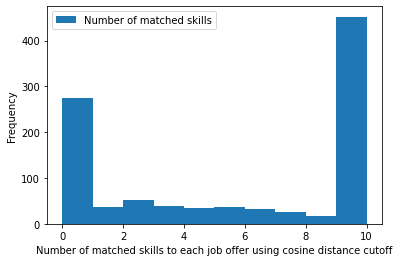

In [49]:
plt.hist([len(x) for x in topResultsDf["TOP_SKILL_IDS"]], label="Number of matched skills")
plt.xlabel('Number of matched skills to each job offer using cosine distance cutoff')
plt.ylabel('Frequency')
plt.legend()


In [52]:
topResultsDf

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_SKILL_MATCHES,TOP_SKILL_IDS,BEST_SKILL_MATCH_3SENT,BEST_SKILL_ID_3SENT,BEST_SKILL_MATCH_1SENT,BEST_SKILL_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES
806,17348916,21650,A minimum profile Higher education in computer...,"[ArcGIS software or ESRI ArcMap or QGIS , Auto...","[330, 326, 324, 380, 369, 368]",ArcGIS software or ESRI ArcMap or QGIS,330,ArcGIS software or ESRI ArcMap or QGIS,330,0.339181,<b>Profil minimum requis :</b>\n<ul>\n <li>For...,0.339181,[0.339181158247463]
152,14443080,24210,Industrialization and Quality Engineer. Stim...,"[Knowledge of raw materials, production proces...","[383, 323, 374, 370, 350, 371, 385, 377, 299, ...","Knowledge of raw materials, production process...",383,"Knowledge of raw materials, production process...",383,0.488099,Industrialization and Quality Engineer.\n\n\nS...,0.499768,"[0.7571306846610115, 1.0180303689153778, 1.017..."
347,18311336,24210,Caring for the world one person at a time ins...,"[Knowledge of raw materials, production proces...","[383, 374, 323, 358, 370, 385, 352, 306, 321, ...","Knowledge of raw materials, production process...",383,Job requires analyzing information and using l...,352,0.419813,"<b></b>\n<br>\n<p><b>""Caring for the world… on...",0.504366,"[0.9700500700897386, 0.9316497969794098, 0.996..."
309,18603256,24210,Caring for the world one person at a time insp...,"[Knowledge of raw materials, production proces...","[383, 352, 374, 296, 321, 310, 324, 323, 358, ...","Knowledge of raw materials, production process...",383,Job requires analyzing information and using l...,352,0.437317,<b></b>\n<br>\n<p><b><i>Caring for the world… ...,0.506743,"[0.9700500700897386, 1.1103510465330477, 0.917..."
258,15106636,24210,Associate Specialiste Quality Assurance Req 1...,"[ Job requires being reliable, responsible, an...","[356, 353, 358, 357, 343, 309, 383, 323, 341, ...","Job requires being reliable, responsible, and...",356,Job requires a willingness to take on responsi...,358,0.481532,Associate Specialiste Quality Assurance\n\nReq...,0.530893,"[0.9685674742739729, 0.8012399953207264, 0.730..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,14657778,24210,Innovative and committed to patients worldwide...,[],[],Actively looking for ways to help people.,318,Actively looking for ways to help people.,318,0.703944,Innovativ und engagiert für Patienten weltweit...,0.915089,"[0.7039442686699435, 0.9154911825957898, 1.125..."
746,14844581,24210,Sana Avenue du Casino 26 1820 Montreux httpww....,[],[],HEC-RAS or IWR-PLAN,325,HEC-RAS or IWR-PLAN,325,0.755792,ASANTE SANA\n\n\nAvenue du Casino 26\n1820 Mon...,0.915491,"[1.0289480498975334, 0.7557922984437846, 0.961..."
695,14789230,24210,Sana Avenue du Casino 26 1820 Montreux httpww....,[],[],HEC-RAS or IWR-PLAN,325,HEC-RAS or IWR-PLAN,325,0.755792,ASANTE SANA\n\n\nAvenue du Casino 26\n1820 Mon...,0.915491,"[1.0289480498975334, 0.7557922984437846, 0.961..."
221,14256709,24210,10. 04. 17 Responsible Product Quality Assurance,[],[],"Job requires maintaining composure, keeping em...",363,"Knowledge of raw materials, production process...",383,0.728541,10.04.17 Responsable Assurance Qualité Produit,0.918365,"[0.9270152470368054, 0.8472090935522181, 0.980..."


In [54]:
annotatedJobs200 = pd.read_csv("Data/AnnotatedJobs200.csv", sep=";")

In [55]:
topResultsDf["GREEN_IDENTITY"] = annotatedJobs200["GREEN_IDENTITY"].astype('bool')

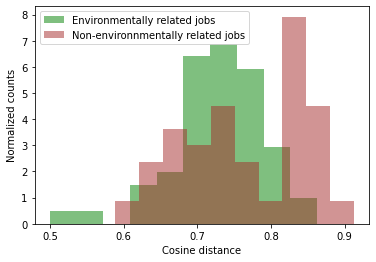

In [56]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 1.0], label="Environmentally related jobs", color='green', density=True, alpha=0.5)
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 0.], label="Non-environnmentally related jobs", color='brown', density=True, alpha=0.5)
plt.xlabel("Cosine distance")
plt.ylabel("Normalized counts")
plt.legend()

In [31]:
topResultsDf = topResultsDf.sort_values(axis=0, by="AVERAGE_DISTANCE_3SENT")

In [32]:
topResultsDf.to_csv("PrelimSkillsResults1000V26.csv")

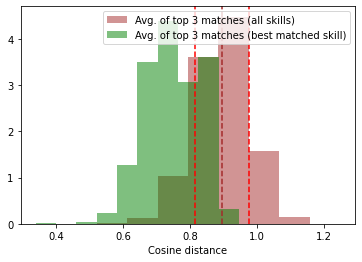

In [46]:
plt.hist(skillsResultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (all skills)", density=True, alpha=0.5, color = 'brown')
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (best matched skill)", density=True, alpha=0.5, color = 'green')
plt.axvline(np.mean(skillsResultsDf["AVERAGE_DISTANCE_3SENT"]), color='brown', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean()+skillsResultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean()-skillsResultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
plt.xlabel('Cosine distance')
plt.legend()

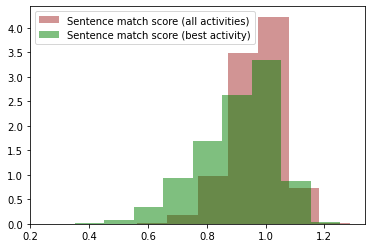

In [34]:
plt.hist([x for y in skillsResultsDf["DISTANCES"] for x in y], label="Sentence match score (all activities)", density=True, alpha=0.5, color = 'brown')
plt.hist([x for y in topResultsDf["DISTANCES"] for x in y], label="Sentence match score (best activity)", density=True, alpha=0.5, color = 'green')
plt.legend()

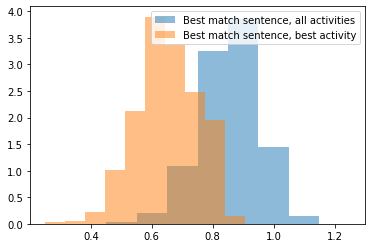

In [35]:
plt.hist(skillsResultsDf["LOWEST_DISTANCE"], label="Best match sentence, all activities", density=True, alpha=0.5)
plt.hist(topResultsDf["LOWEST_DISTANCE"], label="Best match sentence, best activity", density=True, alpha=0.5)
plt.legend()

In [57]:
topResultsDf[topResultsDf["AVERAGE_DISTANCE_3SENT"] < 0.8158].to_csv("PrelimResultsSkills200V26_GoodMatches.csv")

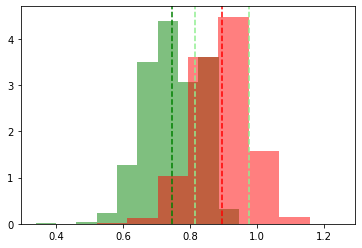

In [36]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (best matched activity)", alpha=0.5, color = 'green', density=True)
plt.hist(skillsResultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (all activities)", color='red', alpha=0.5, linestyle='dashed', density=True)
plt.axvline(topResultsDf["AVERAGE_DISTANCE_3SENT"].mean(), color='green', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean(), color='red', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean()+skillsResultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='lightgreen', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_3SENT"].mean()-skillsResultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='lightgreen', linestyle='dashed')
#plt.legend()

In [37]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_5SENT"], label="Avg. of top 3 matches (best matched activity)", alpha=0.5, color = 'green', density=True)
plt.hist(skillsResultsDf["AVERAGE_DISTANCE_5SENT"], label="Avg. of top 3 matches (all activities)", color='red', alpha=0.5, linestyle='dashed', density=True)
plt.axvline(topResultsDf["AVERAGE_DISTANCE_5SENT"].mean(), color='green', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_5SENT"].mean(), color='red', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_5SENT"].mean()+skillsResultsDf["AVERAGE_DISTANCE_5SENT"].std(), color='lightgreen', linestyle='dashed')
plt.axvline(skillsResultsDf["AVERAGE_DISTANCE_5SENT"].mean()-skillsResultsDf["AVERAGE_DISTANCE_5SENT"].std(), color='lightgreen', linestyle='dashed')
#plt.legend()

KeyError: 'AVERAGE_DISTANCE_5SENT'

In [ ]:
skillsResultsDf[skillsResultsDf["JOB_ID"] == 10814567]["AVERAGE_DISTANCE_3SENT"].idxmin()

In [ ]:
skillsResultsDf.loc[143]

In [ ]:
topResultsDf